In [1]:
import numpy as np
from pyESN import ESN
from matplotlib import pyplot as plt
import random
import sys
np.set_printoptions(threshold=sys.maxsize)


menor = np.loadtxt("esn_big_minstable_r4_x0.1_d1000.csv", delimiter=",")
list_of_x0 = np.loadtxt("esn_random_x0.1_r4.csv", delimiter=" ")


In [2]:
err_px = np.zeros((menor.shape[0],2))

for i in range(menor.shape[0]):
    err_px[i,0] = list_of_x0[i]
    err_px[i,1] = menor[i,3]

err_px = err_px[err_px[:,0].argsort()]

print(err_px)

[[2.44492071e-09 2.36802571e-01]
 [7.41006975e-08 4.24139352e-02]
 [3.93415195e-07 2.54031563e-03]
 [5.81085595e-07 1.28184676e-02]
 [7.97508124e-07 5.42369020e-02]
 [1.74242480e-06 1.71475281e-03]
 [2.63847185e-06 1.14191296e-03]
 [3.79325087e-06 1.45514041e-03]
 [4.19810114e-06 1.02757730e-02]
 [5.02091318e-06 4.37031835e-03]
 [6.91937608e-06 1.25400469e-03]
 [6.92611200e-06 2.56294111e-03]
 [7.32404185e-06 1.25010736e-03]
 [7.61727401e-06 1.37063553e-03]
 [9.60262898e-06 1.50280019e-03]
 [1.02281656e-05 7.97408973e-03]
 [1.10266916e-05 3.65638930e-03]
 [1.39947051e-05 4.39096721e-03]
 [1.44873031e-05 7.08233225e-04]
 [1.51127734e-05 3.23668454e-03]
 [1.76875741e-05 1.53503314e-01]
 [1.91125069e-05 5.86758546e-03]
 [2.12932776e-05 7.78436078e-04]
 [2.23319730e-05 4.85299312e-03]
 [2.54461722e-05 4.33445371e-03]
 [2.56150456e-05 1.77829105e-03]
 [2.62931491e-05 2.41289932e-03]
 [2.74318135e-05 3.44234490e-03]
 [2.96873470e-05 6.52686474e-03]
 [3.02665182e-05 2.05285152e-02]
 [3.033118

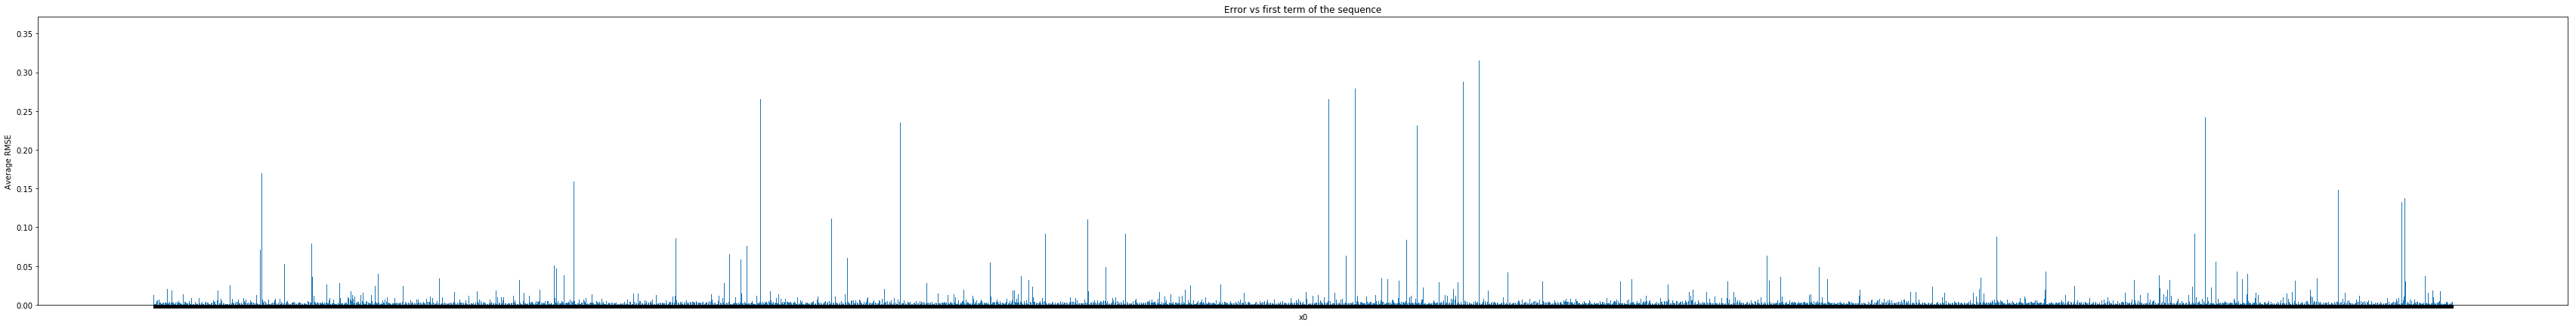

In [12]:
ind = np.arange(menor.shape[0])

label = []

plt.figure(figsize=(60,7))
plt.bar(ind, err_px[:,1])
plt.xticks(ind,label, fontsize=10, rotation=30)
plt.title('Error vs first term of the sequence')
plt.ylabel('Average RMSE')
plt.xlabel('x0')
plt.show()

[176.  92.  59.  43.  60.  52.  53.  49.  82. 167.] [1917.  836.  675.  609.  607.  565.  627.  717.  834. 1868.] [171.  97.  73.  51.  59.  66.  48.  56.  80. 174.]
[0.20630892 0.09363669 0.07360406 0.063905   0.06598985 0.06236403
 0.06635243 0.07496374 0.09082669 0.20204859] [0.21128451 0.11044418 0.07082833 0.05162065 0.07202881 0.06242497
 0.06362545 0.05882353 0.09843938 0.20048019] [0.20713128 0.09032955 0.07293355 0.06580227 0.06558617 0.06104808
 0.06774716 0.07747164 0.09011345 0.20183684] [0.19542857 0.11085714 0.08342857 0.05828571 0.06742857 0.07542857
 0.05485714 0.064      0.09142857 0.19885714]
oi [1.0241172  1.17949677 0.96228836 0.80777162 1.09151353 1.00097714
 0.95890159 0.78469308 1.08381556 0.99223754] [1.00398607 0.96468114 0.99089029 1.02968884 0.99388272 0.9788989
 1.0210201  1.03345477 0.99214731 0.99895203] [0.94726186 1.18390707 1.13347783 0.91206809 1.0218022  1.20948837
 0.8267541  0.85374607 1.00662675 0.98420458]


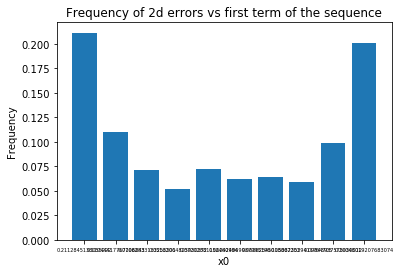

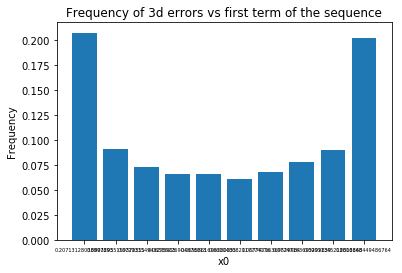

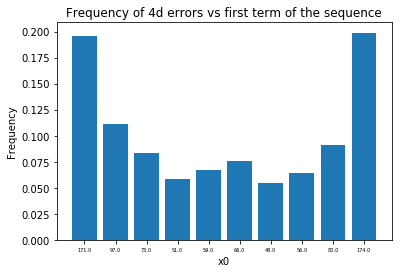

oi [1.0241172  1.17949677 0.96228836 0.80777162 1.09151353 1.00097714
 0.95890159 0.78469308 1.08381556 0.99223754] [1.00398607 0.96468114 0.99089029 1.02968884 0.99388272 0.9788989
 1.0210201  1.03345477 0.99214731 0.99895203] [0.94726186 1.18390707 1.13347783 0.91206809 1.0218022  1.20948837
 0.8267541  0.85374607 1.00662675 0.98420458]


ValueError: shape mismatch: objects cannot be broadcast to a single shape

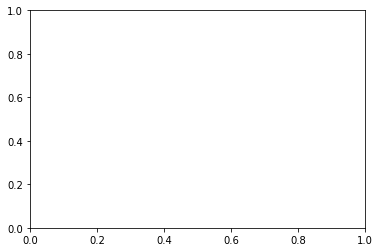

In [28]:
div = 10

cont = np.zeros((div))
cont2d = np.zeros((div))
cont3d = np.zeros((div))
cont4d = np.zeros((div))

for i in range(menor.shape[0]):
    cla = int((list_of_x0[i]*div**2)/div)
    cont[cla] +=1
    if menor[i,3]<0.1 and menor[i,3]>0.01:
        cont2d[cla] +=1
    elif menor[i,3]<0.01 and menor[i,3]>0.001:
        cont3d[cla] +=1
    elif menor[i,3]<0.001:
        cont4d[cla] +=1
        
print(cont2d,cont3d,cont4d)


freq_cont = np.zeros((div))
freq_cont2d = np.zeros((div))
freq_cont3d = np.zeros((div))
freq_cont4d = np.zeros((div))

freq_cont = cont/np.sum(cont)
freq_cont2d = cont2d/np.sum(cont2d)
freq_cont3d = cont3d/np.sum(cont3d)
freq_cont4d = cont4d/np.sum(cont4d)

print(freq_cont,freq_cont2d,freq_cont3d,freq_cont4d)

ind = np.arange(div)

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont2d)
plt.xticks(ind,freq_cont2d, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont3d)
plt.xticks(ind,freq_cont3d, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont4d)
plt.xticks(ind,cont4d, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
#plt.figure(figsize=(10,3))
plt.bar(ind,label, freq_cont2d/freq_cont)
plt.xticks(ind,freq_cont2d/freq_cont, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont3d/freq_cont)
plt.xticks(ind,freq_cont3d/freq_cont, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont4d/freq_cont)
plt.xticks(ind,cont4d, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

0.0005886494929817662 0.9166326660728212 91
0.007803606952394976 0.9993688046981213 99
0.0009746266179798431 0.4287610454288413 42
0.00908744049613359 0.06297357215643415 6
0.00168945260052354 0.3021936140509269 30
0.0023523937831284943 0.8225162452105635 82
0.0012323669336229508 0.3494438726412857 34
0.002331612947660785 0.9486736913030194 94
0.001234417921855141 0.22611298094764248 22
0.0010567336806567241 0.30534283873393314 30
0.01686787356658614 0.7573185057225569 75
0.001295602768411882 0.0002719800303247933 0
0.002418736866576958 0.9883195784598877 98
0.0017409976697096445 0.03407471071122184 3
0.006526864741120864 2.968734702133337e-05 0
0.009015791193510479 0.73215536828358 73
0.006630622351325981 0.9981969654827321 99
0.0007409088795175658 0.14419560786828908 14
0.0007738097422182477 0.14219104863777343 14
0.005407643647389928 0.9439578436921682 94
0.01148633154993903 0.12630459823942644 12
0.0715484657174326 0.005885287352816873 0
0.0009036688303021067 0.5788757368595582 57


0.00150911352188614 0.9999987114601712 99
0.0022962648400129742 0.20531669877781825 20
0.0023831569860289833 0.8802346931611967 88
0.0008730428725191048 0.9645490975775685 96
0.011873327934642507 0.12281115841437326 12
0.0037396311946621347 0.8973386761134843 89
0.002307627572620843 0.22117684065084728 22
0.0009427629748306914 0.06453251110792207 6
0.0014118267702850453 0.6559101664885642 65
0.015340180527585555 0.9942009375690969 99
0.009956748006250545 0.166012205404805 16
0.0020866232864896863 0.20610007725188645 20
0.003374529901989789 0.2744880559728053 27
0.001422416967782669 0.012095260027178152 1
0.002493377158969929 0.004914110690995513 0
0.004408333055281271 0.49515528000452047 49
0.0015263746403313403 0.8133643048160938 81
0.0057702972612229605 0.7068161971402515 70
0.003235782975514865 0.32530115272689286 32
0.0031158096355597092 0.214978231840929 21
0.0013869054981503971 0.746267426977079 74
0.0030999512251782355 0.04052776322125766 4
0.0033628331790815846 0.23496792731841

0.0017081809268312208 0.7437214302033637 74
0.005815439527088891 0.750614198089653 75
0.0008607467174659212 0.26920455555921274 26
0.0005927353332616422 0.02698697117109648 2
0.001493638873415745 0.10365180509282296 10
0.01212330374399423 0.9307936637423515 93
0.0010071680910021942 0.04486522257895128 4
0.0036872226249267236 0.8358152705892542 83
0.0038510183744440876 0.9979541788861512 99
0.0017741008974021934 0.15216628126127196 15
0.005492921192195273 0.7815916957021894 78
0.0020057807715560976 0.28131832184639727 28
0.004314065463237056 0.1260980059063371 12
0.001738869461108263 0.8381580298901483 83
0.0044753373641148635 0.3183920591057654 31
0.0009625648894559115 0.4010706129893856 40
0.0017696842565378585 0.03369860453737956 3
0.0018862102494077632 0.935302467267394 93
0.0018534971690668714 0.2500394009038188 25
0.0022980536966794446 0.2773594128694967 27
0.0025816733073956194 0.6014993190592383 60
0.00158778697257775 0.0021788494930624143 0
0.006493669288567574 0.97168575575068

0.0006892794423575336 0.14465087373994504 14
0.006001018726852303 0.13371001914352032 13
0.0017932104783945626 0.9027895958071399 90
0.0018367651756224259 0.018360649848070187 1
0.009053241709811971 0.03639623276628522 3
0.029381475365710955 0.9603140322834903 96
0.001982676226760979 0.0017339426403211575 0
0.026693530157238972 0.8917123226938811 89
0.0015594550778915048 0.5061093983339396 50
0.0014794540212292205 0.44985063894836386 44
0.000874868418615066 0.4420081969191529 44
0.01189009082775764 0.057815766071847886 5
0.004671974722004074 0.717852349851201 71
0.0029024307861158717 0.4161602701776511 41
0.003401469644110541 0.33834549629346944 33
0.0034108058833046953 0.08612967651375172 8
0.0013668525728220075 0.05137934746405817 5
0.0021946739779022035 0.468669504746186 46
0.0020647014888133287 0.9466036105242966 94
0.01232834965279316 0.005511387340888916 0
0.002160206140081966 0.46000897441743643 46
0.0030105549515389903 0.6112645384577376 61
0.0015442144770873671 0.9894601822742

0.0013019601498149222 0.9994488888613204 99
0.001563603115063419 0.9564513369710087 95
0.01453750352954606 0.008483198904482545 0
0.002182806459323526 0.790965968948458 79
0.0017228096051568758 0.19844448842825457 19
0.0011292102543602493 0.04475904021980018 4
0.0015437337943730357 0.5689278881767948 56
0.001521828520579066 0.10676000200768607 10
0.0008864728589795551 0.1951941248899835 19
0.0014057755721069152 0.10777995832201248 10
0.0014355047302881724 0.03834216014782206 3
0.0022523439117366614 0.9998445855331608 99
0.003222582599925461 0.12500317665669602 12
0.0019150977678351953 0.5733019197596723 57
0.0004765511831045821 0.01708684698959219 1
0.0011315817602863495 0.03186597857577875 3
0.0016762124377264632 0.9810276706992951 98
0.0011009209928604462 0.87800842457706 87
0.0014736617722117733 0.962171609909522 96
0.0022960239806208466 0.10582872495067683 10
0.01664396193217569 0.02267961151433958 2
0.00221469038776375 0.7434422038680205 74
0.0026116147061176825 0.0058333751288689

0.0037551440032706496 0.5728063671382606 57
0.0018686951327995683 0.5229868737367469 52
0.0031590969004729637 0.0018772193402502768 0
0.0016039165792028115 0.005735681577301203 0
0.001995788626504969 0.09155604531913358 9
0.001506685147275861 0.8804053339770518 88
0.071785754249912 0.004488738591606285 0
0.0010660912602390037 0.6808199992055207 68
0.0013777357560820615 8.88709868608304e-05 0
0.001357731179719364 0.0742430617643412 7
0.004663898417275046 0.7414370046448462 74
0.01451610340745337 0.6144715455601095 61
0.002198535680151844 0.9893012838828342 98
0.002054820292882047 0.9390118281705673 93
0.0023891095264473748 0.5207190288458077 52
0.001496010284482428 0.3394720294475987 33
0.0014081512915480455 0.0028010630916108495 0
0.005261259309500829 0.8128554849870354 81
0.005082408624292384 0.5804846544703511 58
0.00279365993153766 0.8444220546585081 84
0.0019149088186201522 0.998408652349846 99
0.0015523935077978617 0.28663852305269844 28
0.008589513975970128 0.4649597527208693 46


0.0006205332576434072 0.12781406792769628 12
0.0019206271502517818 0.7659868318882582 76
0.001873290201714343 0.7175717916484652 71
0.0022916230392020526 0.15973767632208388 15
0.0020853062630939163 0.6058313395895966 60
0.0008173195027834372 0.1546508871558153 15
0.0014277236217525554 0.7190598085903155 71
0.0029188051969116524 0.01023882399176935 1
0.024304450643575913 0.4030117725982609 40
0.005037232995512464 0.9981711242094594 99
0.0030698684866888584 0.6320180034710423 63
0.003911952178992826 0.407969578965444 40
0.004025651601374626 0.735628565987208 73
0.0031864798740279636 0.8801870378171371 88
0.0007897312729064616 0.4530786364372405 45
0.005410017980448267 0.7259713907475539 72
0.0010754257326367964 0.4346826410445414 43
0.0011152372863035772 0.7914619862301766 79
0.002996889299907288 0.09272757142085816 9
0.0020119916107394055 0.7033576811925429 70
0.0035039126373517726 0.804531210484204 80
0.0018976324636820945 0.6953228299310288 69
0.0034886983959934266 0.8132712302401026

0.002269324079348607 0.9307476800046621 93
0.0020525628012567 0.4372230875374507 43
0.013751621087811935 0.8175128555479854 81
0.001513976975969485 0.04703023776867041 4
0.0019218111746734001 0.9999140223709402 99
0.00527183874705715 0.9587314362819863 95
0.004690495288385153 0.74367138069457 74
0.0013635384615900941 0.0004523001121408408 0
0.0015099213686736181 0.44247550221165927 44
0.0025624403600877543 0.17529184131548908 17
0.0011837156019658774 0.061825995724604316 6
0.0027536266029930525 0.8450509613699393 84
0.0031609566809272793 0.6609657520655127 66
0.001935840451941618 0.8057872063604499 80
0.0015540117144817744 0.037552778957584 3
0.0028462219076364806 0.9983000262726686 99
0.0038699446644084434 0.23671658480145677 23
0.0017914870796610733 0.9097454203242362 90
0.00239270296332181 0.3001279392025573 30
0.00962771583662476 0.7485856266172836 74
0.00968865473998158 0.8443641011255371 84
0.0025050144510965593 0.7564036904419889 75
0.004136837105606065 0.9981352504070488 99
0.0

0.002073150202551986 0.8689454472069843 86
0.0014719922084907423 0.9812863131087127 98
0.09535752839437268 0.8451192249850278 84
0.0043976687621198555 0.7463316687094097 74
0.0009591633414115345 0.3224471975397139 32
0.0010223614779541646 0.7288426680581721 72
0.0036276509731319254 0.7002677874068544 70
0.0005419989582807064 0.8723765661913528 87
0.0031796307144002322 0.16233068772670303 16
0.002705910574053984 0.054871697776997824 5
0.0015147883938455868 0.9540592074316111 95
0.006096912210303528 0.9847479169583119 98
0.002061242414512359 0.7611213575364436 76
0.00240082396268039 0.9969693646556411 99
0.001550808564848128 0.859203801835439 85
0.001481377948033825 0.546577328923434 54
0.0013336302170210204 0.4896063324487028 48
0.013893166513350062 0.20518930235030658 20
0.00691443611159288 0.17836914102283788 17
0.0021822075102565226 0.9996312965585333 99
0.002832558543075159 0.01575934113066726 1
0.00417013393349037 0.026145895048714778 2
0.001995417241750011 0.34925438005300813 34
0

0.02063321845045069 0.3639359167041249 36
0.024935974085369846 0.9977376949715862 99
0.00197263427512774 0.42950877239628604 42
0.0007795708099592708 0.3256095808642762 32
0.002168807030169348 0.26464439332017947 26
0.001005832242161075 0.8237628705376558 82
0.001237179858107481 0.17955113108573822 17
0.0028947464153045244 0.6382477098489532 63
0.0019953169288039543 0.9921744689459152 99
0.002636702165603006 0.1714302560688621 17
0.0007102871102029254 0.9882490210170267 98
0.003092609196513375 0.5880172887797908 58
0.0015854458973335267 0.9947308165313848 99
0.038554684557832515 0.8970088865900953 89
0.002089686942125164 0.011611759989098552 1
0.009914060585083784 0.9953255705805807 99
0.0028614114161471514 0.5765092160728146 57
0.0014129044218987368 0.36958991220739734 36
0.002244144130560213 0.921889981156737 92
0.0016589908973798978 0.03865557632589651 3
0.001991587988088375 0.8666499495332591 86
0.0014042044044632587 0.07826308131084972 7
0.003040946783522131 0.9180214113289379 91


0.0014252355124001388 0.9071285167760978 90
0.0033737562496480057 0.8786403620503288 87
0.0014191601452565724 0.9992969777858699 99
0.0018842413505382183 0.35488869638777387 35
0.002766473616531009 0.9892106176979846 98
0.013430385428463417 0.2973126619333306 29
0.005023711478970428 0.44537109990561197 44
0.0017608753569686548 0.15425609305602564 15
0.0020786628575297965 0.027146419587676746 2
0.001652147913507079 0.048753782848175976 4
0.005620879559056786 0.9544328852371184 95
0.012723908230398623 0.44083982474229527 44
0.004360469746723254 0.11344366488870417 11
0.0027684637711317263 0.48781376188958914 48
0.001975779571419954 0.06595061686645748 6
0.0011649895359665003 0.012738626958382644 1
0.0007812953714561448 0.23525623611425048 23
0.00800459064702715 0.0001802253032446237 0
0.015363055855748228 0.8402342934584882 84
0.0023765376968975767 0.7693431434171878 76
0.0033606476519015523 0.027005795842248704 2
0.0017806357560467179 0.21187938393282463 21
0.005104660542087354 0.604682

0.0012702474968129974 0.5390524625801073 53
0.0010438937467751011 0.47292783723690535 47
0.00197288956154589 0.9070129920377399 90
0.0019657272589511535 0.5976814867023387 59
0.002295321726887703 0.9924820620764321 99
0.004457801423973899 0.20711615078919537 20
0.001066954839765489 0.9886228728888673 98
0.001058653816323895 0.01747822317774594 1
0.0017403528973268488 0.9805718998824505 98
0.0034469175859457787 0.2570873295439925 25
0.0015017381038255609 0.9903738961300833 99
0.000633897672690334 0.29079714462135386 29
0.0008708960160230484 0.3280091467859802 32
0.003361447828393042 0.8816765856428539 88
0.002099443447603527 0.7639836501603411 76
0.00409063692791011 0.20908227297219878 20
0.0043259282810291805 0.05464463790481942 5
0.003226443441619802 0.33077607536847187 33
0.002198084272096598 0.026197544832687845 2
0.0017681735468865988 0.5287358283800229 52
0.0022050917224198914 0.29271395017684126 29
0.0014833312397877644 0.15687953494879592 15
0.0023635928543995766 0.0626438447822

0.0014889854677438213 0.16652816229012507 16
0.007217357419964831 0.574415191099575 57
0.04954074594418014 0.787738581163993 78
0.0017087278283070854 0.05544498722300253 5
0.003897836643187831 0.6013897112645875 60
0.0029392630905632332 0.2708026411285674 27
0.0026728865546728655 0.2804779820842429 28
0.0014333305977356897 0.22056073230859105 22
0.004956421932255841 0.9655818745381181 96
0.002470791904134232 0.0021385664340540372 0
0.0033767181515895884 0.9996628914761295 99
0.003025097116242653 0.02856249582950059 2
0.0032833420810307527 0.6596936541800947 65
0.000787852811805605 0.9986018085074884 99
0.0019693626187442027 0.19142204480253405 19
0.0017519534281319534 0.7866906360714814 78
0.0041421305605685915 0.9514851836414386 95
0.002346035856145869 0.12032772003023481 12
0.00664330275164675 0.019083066392453146 1
0.0027518597351465853 0.2509861947488074 25
0.0010737601286616317 0.9591564951734618 95
0.0024201343240543077 0.9462332951635616 94
0.0016581803528429196 0.99988421613699

0.0012640356644306725 0.5631006441851357 56
0.007295662611124962 0.38603705875865224 38
0.0018827665511735776 0.8391772583828438 83
0.0035668354710592176 0.010236219296218086 1
0.0022452957547975947 0.5665151520162605 56
0.0010062447353921904 0.6976692462260007 69
0.017193074978654115 0.8847753206380183 88
0.0034151660419436077 0.8621367148863243 86
0.0019117681444186234 0.9252620844815582 92
0.014104212560668036 0.7473697897901218 74
0.008828629193261358 0.8873027385260314 88
0.004180534857297546 0.7785405095501617 77
0.000726853158053666 0.8449377682015379 84
0.003715846411201571 0.12178158211551615 12
0.0026110655928924514 0.032705927412579563 3
0.004911087055932997 0.00489373104171056 0
0.0015986934932541701 0.03233721762763909 3
0.0014607561744331545 0.9256845675343964 92
0.0014767942060164767 0.9690744249764205 96
0.0023854697337084736 0.9837555751906563 98
0.002745954510937422 0.5060353015593608 50
0.0014700514599090228 0.9801970224703874 98
0.004643582760682832 0.99706351837143

0.0010151076703797024 0.9589316070211117 95
0.0019187705479311533 0.3108485482812385 31
0.0016085059081122274 0.707813628172635 70
0.001776789165608768 0.9828833961618031 98
0.001222707010798169 0.8680366012867393 86
0.0019268413730212416 0.04475952658036587 4
0.0038169328564777983 0.42491964781288 42
0.0011684352812382597 0.01094715875289058 1
0.0033283549039361143 0.8440741910190369 84
0.0022688960486362546 0.9996448692790326 99
0.0011448126947619837 0.9284943273001262 92
0.0019618004816482613 0.03305494055004076 3
0.0035999190859269136 0.8407673927969839 84
0.0029330360903605784 0.15507475551029343 15
0.002541625971265883 0.13460441306650237 13
0.008713240131260095 0.07126592240786075 7
0.0016785770631627425 0.19374921416076746 19
0.0011159327093519763 0.618215392034704 61
0.050790729516609796 0.019219662707930116 1
0.004172734885469105 0.9936993561408238 99
0.000877037816969897 0.34534747629558094 34
0.005200220301008292 0.7690455082251474 76
0.006213560702479386 0.8458307350670363

0.0023247197484876597 0.9997738312804126 99
0.003537547682173899 0.9993643402699173 99
0.0029767853757043526 0.7320838425156798 73
0.003767198601719498 0.7263194225990811 72
0.0012865759400731782 0.06974100485698666 6
0.003482484905869328 0.062285461171552724 6
0.0017989037236540771 0.315597253319334 31
0.0018355880507257537 0.09882770417811655 9
0.0016270075138476367 0.5231470043207428 52
0.003629945287403025 0.09095767357454818 9
0.002753827151819648 0.6792013219917222 67
0.00211251048835156 0.8586916660166257 85
0.0010774964579461659 0.701502229963922 70
0.0010659463291736876 0.9007109167784453 90
0.0016281553690989557 0.10829768431258147 10
0.0012489980983602775 0.35721793275620745 35
0.002626404646443635 0.010560634344976337 1
0.0011502104638362182 0.39984483583781666 39
0.0012482928486490426 0.24109095230878946 24
0.0013939663728162524 0.0053753714204218435 0
0.0005935359240097836 0.9429158829916302 94
0.002833880763973623 0.9666619532620324 96
0.03686743722977821 0.9995912840310

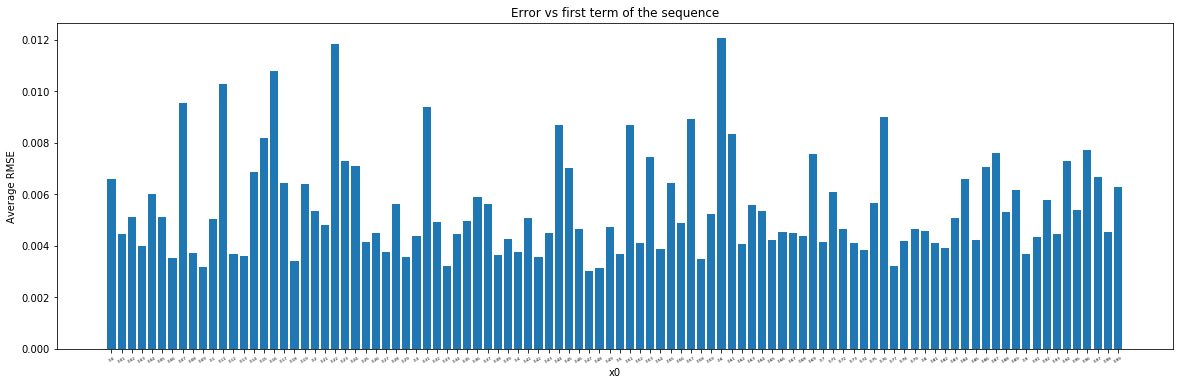

In [29]:
div = 100

aver = np.zeros((div))
cont = np.zeros((div))
for i in range(menor.shape[0]):
    cla = int((list_of_x0[i]*div**2)/div)
    print(menor[i,3],list_of_x0[i],cla)
    aver[cla] = aver[cla] + menor[i,3]
    cont[cla] +=1
    
print(aver/cont)

ind = np.arange(div)

label = []

plt.figure(figsize=(20,6))
plt.bar(ind, aver/cont)
plt.xticks(ind,ind/div, fontsize=4, rotation=30)
plt.title('Error vs first term of the sequence')
plt.ylabel('Average RMSE')
plt.xlabel('x0')
plt.show()

0.0005886494929817662 0.9166326660728212 916
0.007803606952394976 0.9993688046981213 999
0.0009746266179798431 0.4287610454288413 428
0.00908744049613359 0.06297357215643415 62
0.00168945260052354 0.3021936140509269 302
0.0023523937831284943 0.8225162452105635 822
0.0012323669336229508 0.3494438726412857 349
0.002331612947660785 0.9486736913030194 948
0.001234417921855141 0.22611298094764248 226
0.0010567336806567241 0.30534283873393314 305
0.01686787356658614 0.7573185057225569 757
0.001295602768411882 0.0002719800303247933 0
0.002418736866576958 0.9883195784598877 988
0.0017409976697096445 0.03407471071122184 34
0.006526864741120864 2.968734702133337e-05 0
0.009015791193510479 0.73215536828358 732
0.006630622351325981 0.9981969654827321 998
0.0007409088795175658 0.14419560786828908 144
0.0007738097422182477 0.14219104863777343 142
0.005407643647389928 0.9439578436921682 943
0.01148633154993903 0.12630459823942644 126
0.0715484657174326 0.005885287352816873 5
0.0009036688303021067 0.5

0.0018374688752974334 0.9989988012198303 998
0.003312898441959884 0.622564290826277 622
0.0018988339611729968 0.35690682328216006 356
0.010886458771683802 0.38851901806782924 388
0.004278556633737596 0.9489023512098888 948
0.005678828965499656 0.03125666725922008 31
0.0023440055932459356 0.830370298816683 830
0.0016929778150739378 0.00848060764250697 8
0.002719332879201565 0.6451731692057773 645
0.002470315308386403 0.8681802982725387 868
0.0008378333427714981 0.16067176123825475 160
0.0027145862459053626 0.203294615138654 203
0.0016636177592710877 0.36372212300360085 363
0.0008835091828346975 4.2839018116324766e-05 0
0.0028370330041338474 0.6491026033731484 649
0.00534209825961658 0.7322850054132616 732
0.0029193756506557776 0.7077316666007625 707
0.003919502936639326 0.7001330835902418 700
0.0008552932479599502 0.5825184024101786 582
0.25700457375773766 0.8710256237787786 871
0.0027086532968089126 0.2822815097428278 282
0.005577905669601707 0.6092036936292948 609
0.002849406465368124

0.0006666542692640398 0.008282418154061513 8
0.0008738648455290043 0.13540668927371255 135
0.005791436190856382 0.00016986023115458967 0
0.0007268483464021892 0.8031710242908289 803
0.002864423324432435 0.03485831627883683 34
0.002715209041460793 0.002618339593940656 2
0.0016365272554054052 0.9494956019773536 949
0.0014443850599559955 0.3975563164727832 397
0.0015372401739857495 0.42294890199053475 422
0.002184555410627835 0.5262028837342703 526
0.001395240926895256 0.7655208548019501 765
0.03682806653075034 0.9986458988382868 998
0.0013194646860618922 0.7042770124306761 704
0.0037559968234829734 0.36990016657816094 369
0.0012760212402788415 0.5375755223597919 537
0.005320430185935383 0.3674206381006629 367
0.0015031978551104856 0.02387344903304141 23
0.0037508493768711377 0.9517616814565321 951
0.004131030045558771 0.12404222916263423 124
0.0026927640887778005 0.7951647544755046 795
0.0017143602957569917 0.01454952391846676 14
0.005977073930095954 0.6279003038033233 627
0.002294323432

0.0017495943619160914 0.993715893091619 993
0.0013573382955793403 0.06528891706584425 65
0.0015592077356303962 0.9933502096697249 993
0.0016254844495374532 0.9206891915956954 920
0.007491059329015507 0.10564639097398802 105
0.002289430175065425 0.9107315819370388 910
0.0009704788256305093 0.941521584925373 941
0.006296068672510567 0.8107916515585715 810
0.004826009548301636 0.711315003262082 711
0.0016972287911067082 0.3081313707349327 308
0.00733475369509135 0.22163777138750826 221
0.0032059055095423634 0.9618311742964658 961
0.002076594088841 0.025283865244603927 25
0.0015548977228516325 0.0015512024198894975 1
0.001475349518048615 0.5079808285461043 507
0.002917129347824328 0.9279675214919809 927
0.0033387001691684583 0.773913605388657 773
0.0006078325294257887 0.5479638246195603 547
0.0020390090562576904 0.44027332089158083 440
0.00959620641344596 0.5707234361775706 570
0.003706817352203061 0.8220969694311552 822
0.001483958277100898 0.03167291251822156 31
0.0019687677641958123 0.9

0.010365868605331825 0.986637744963483 986
0.06879302261301759 0.8931749905842044 893
0.0014855393639288887 0.6668778489549437 666
0.008909555894610248 0.8327184402195597 832
0.0019107580198208282 0.19010894452256444 190
0.0020085065180381234 0.6864113025174541 686
0.022555111870794824 0.9736954556573669 973
0.0018087130022630688 0.925060756723912 925
0.0079748803414376 0.6262623132543867 626
0.0038098573908498506 0.027296607223742757 27
0.0033064189859374022 0.7903680440487739 790
0.0018994188421204785 0.9216744701856865 921
0.0017177044314726207 0.2032972491724539 203
0.004160392722269038 0.27062477814169905 270
0.0026679662847629393 0.9400730847134376 940
0.004225118779279346 0.25178946051000156 251
0.0015351697555281954 0.01980783238729374 19
0.002225210625153397 0.043383909770264115 43
0.00286889830843971 0.9884787938770493 988
0.002540031584983531 0.5696133805634602 569
0.002359194886104065 0.7343588927483221 734
0.00833411166858528 0.34045959035113793 340
0.01231376161791082 0.5

0.2881568556523008 0.6073380923038726 607
0.0012051450359161044 0.43900495977120546 439
0.002857118699273912 0.9977730368304264 997
0.0012616701379871463 0.9474568466186041 947
0.004209851790595301 0.27747204413213983 277
0.001052736134766711 0.0015816605991353285 1
0.0007458643121735182 0.1518038387941342 151
0.0013107335690122947 0.8126596298285764 812
0.0020395639417787395 0.8639050650891803 863
0.0015135544427528895 0.5763849290678951 576
0.0021429326578317988 0.04869192365713048 48
0.0007694222060067604 0.945406430680793 945
0.00302734612169244 0.7822581148981813 782
0.0014788669384078526 0.8395318379476241 839
0.001876133671024439 0.19160167280398424 191
0.017526176632113682 0.7731090704423809 773
0.001131161437351093 0.6827007746187898 682
0.0018847807816631521 0.6453405454115152 645
0.0013642504272054323 0.9995193407111211 999
0.0015399100758048741 0.991460454591316 991
0.004277710614353832 0.34622281076171013 346
0.003209979846814071 0.00614412600221867 6
0.0019821288585231784

0.00504266736163099 0.8881944436993209 888
0.004146512723094113 0.931863414205613 931
0.00347988535971215 0.01248824166514472 12
0.0024634651356423513 0.25450168900283093 254
0.0016228979644765597 0.37841990874487025 378
0.0017019219823722332 0.6465404982338211 646
0.0019188140606242372 0.8201595045381421 820
0.0031085238873409258 0.575793056381574 575
0.003083399631245206 0.9733197528158992 973
0.0016252108787895582 0.8364543257157877 836
0.005363109462827083 0.23979589132487653 239
0.0007881614305627879 0.4738610856169351 473
0.001522178109033232 0.13036710643369326 130
0.0014931554703538524 0.004383640054159208 4
0.001673329130605919 0.626279887599826 626
0.008892499061808876 0.4559253230397498 455
0.0007455831453974405 0.14632177133425955 146
0.002693481641820071 0.46752839977771954 467
0.00448770714527459 0.7430781289014798 743
0.003780128658074227 0.737144511979323 737
0.017475171558207846 0.8441484955043819 844
0.0009968140323778599 0.49998667873947467 499
0.0019433710692351397 

0.0016039165792028115 0.005735681577301203 5
0.001995788626504969 0.09155604531913358 91
0.001506685147275861 0.8804053339770518 880
0.071785754249912 0.004488738591606285 4
0.0010660912602390037 0.6808199992055207 680
0.0013777357560820615 8.88709868608304e-05 0
0.001357731179719364 0.0742430617643412 74
0.004663898417275046 0.7414370046448462 741
0.01451610340745337 0.6144715455601095 614
0.002198535680151844 0.9893012838828342 989
0.002054820292882047 0.9390118281705673 939
0.0023891095264473748 0.5207190288458077 520
0.001496010284482428 0.3394720294475987 339
0.0014081512915480455 0.0028010630916108495 2
0.005261259309500829 0.8128554849870354 812
0.005082408624292384 0.5804846544703511 580
0.00279365993153766 0.8444220546585081 844
0.0019149088186201522 0.998408652349846 998
0.0015523935077978617 0.28663852305269844 286
0.008589513975970128 0.4649597527208693 464
0.002161773334197499 0.9446150573906462 944
0.0024019105866621253 0.7656949204503251 765
0.0016092450719547547 0.90103

0.009141638658781136 0.9877956803061096 987
0.002189185990974722 0.06959589210787534 69
0.0021861592308164875 0.9462962663280996 946
0.0012019761494168912 0.90818769358775 908
0.0016501716089261861 0.4055432222670966 405
0.0034385495257145673 0.27737599810074715 277
0.0015596334609875955 0.09759784096722644 97
0.0011925441536211768 0.6085569829420721 608
0.0018576402433810489 0.6920758773014453 692
0.0036315734305810343 0.992031059708882 992
0.005526201976737157 0.9555670328821965 955
0.0013095426575020744 0.04540543963157435 45
0.0027469735231422277 0.018263968062655754 18
0.0030107542675675727 0.4116990297086848 411
0.0019034952597519802 0.004166640141739579 4
0.001856108570941657 0.9386790763523759 938
0.0014607687703938087 0.7835379049720578 783
0.006833094433720937 0.9206399897955629 920
0.00411641592048253 0.7915871942649029 791
0.0006259346047002229 0.32857284825026484 328
0.0034620502431639043 0.6172361537670741 617
0.0013964847716116593 0.612569065254716 612
0.0020314218882327

0.0012411710425798866 0.1372917700334095 137
0.001629766470127735 0.001946212501131202 1
0.0009837906493521135 0.33335670551678864 333
0.03786098545798578 0.18966044487961764 189
0.003174922273688276 0.8665767904724363 866
0.0008476073321280406 0.2687392008377204 268
0.0026822129550819252 0.35411457651005385 354
0.0016874873663050207 0.16924491163256938 169
0.002282555658042101 0.15482953593229978 154
0.002101243050791874 0.24617980298912884 246
0.0006626998202914164 0.7316881603642562 731
0.001929571794934333 0.5362249913314989 536
0.0021556055488101515 0.8612698161613143 861
0.00187616079346198 0.056727358793543924 56
0.0017622418049230964 0.8286770284112162 828
0.0015554045277279148 0.7432057946038075 743
0.005647303019293059 0.45664323616902214 456
0.001483339088191265 0.9885276371208614 988
0.0016402346158439513 0.5973191219357759 597
0.06826581899426518 0.9229492288686132 922
0.0023365118577343314 0.43246962147649576 432
0.0008629127329995036 0.9888061347061344 988
0.001319634001

0.0013677864625181021 0.5894245301937312 589
0.003556542225676509 0.9963082259796603 996
0.003625257379168979 0.25675038660215577 256
0.0017964459682805582 0.3224017711474363 322
0.0009586115176087517 0.9990368712391968 999
0.0008984832251998524 0.9250783280351773 925
0.0022154335704711705 0.23468238948798806 234
0.004131830916395103 0.8412969796055128 841
0.003395320166324729 0.9376219909319716 937
0.0028360121028308655 0.974755508965883 974
0.0036630612672704146 0.9609875949927642 960
0.002459704168724224 0.25243651033645254 252
0.002397711273945839 0.9956928315829809 995
0.005169958615852348 0.0829698809468764 82
0.009785517407621444 0.884640135763578 884
0.0062256390266164086 0.8623675312153399 862
0.004597834851221081 0.7814553657812738 781
0.001970387786994873 0.36553179405833974 365
0.002917141466464493 0.6593865591400231 659
0.010011545929240086 0.03821324555284485 38
0.0027066948590363524 0.9676963149371924 967
0.0023719419922549265 0.00246223331341347 2
0.0016615883532484256 

0.008405487791797577 0.9983204291922786 998
0.021721973651973956 0.17978699205813614 179
0.0012628651661569636 0.025108338942058762 25
0.003145708798734543 0.7349543764204269 734
0.002256821132490825 0.9608875840719019 960
0.019292438790371888 0.6275185360805804 627
0.005823392923596662 0.9474296546838392 947
0.004232339632052864 0.007090706573287473 7
0.0024032233855220473 0.7861342884683652 786
0.005828720748160586 0.391729368947588 391
0.004306480192346709 0.925168234945813 925
0.002049628392375374 0.01616606310254385 16
0.0024143816591478766 0.35609873100000344 356
0.004454099894772498 0.9913442370721184 991
0.00439818210088938 0.45925043446986563 459
0.002125225736837169 0.9975742333005089 997
0.0027872487049269644 0.6557845154233153 655
0.002307298871070878 0.2100929285941198 210
0.006533203454453774 0.17199987873035708 171
0.03350824464843178 0.5496328501966004 549
0.01290008824074609 0.9689782777623287 968
0.0015851827226005418 0.17384236945597517 173
0.004327932550309448 0.124

0.0012630259233784042 0.26968589332187065 269
0.0026180435723235883 0.13454017903794904 134
0.0010088977523321262 0.7499868228613136 749
0.0019469954300238871 0.2543868069378696 254
0.002781292723773515 0.1813435141735676 181
0.0006610647173217296 0.851500084087433 851
0.0023393293965636337 0.25021569383123454 250
0.0010486171525000898 0.5477543880742772 547
0.002547685100875433 0.9938437372790219 993
0.003871384520164226 0.17540352605423723 175
0.01344435094069855 0.26293099644473283 262
0.005620129160109438 0.4337694536937218 433
0.0011709236176610418 0.9624416776181405 962
0.007824041612165761 0.017927478704118937 17
0.0034629279896673695 0.029260319372718925 29
0.0020900876231980435 0.8873761195482087 887
0.002675302708595248 0.3164446278704537 316
0.0038713238415460367 0.010999460112519717 10
0.0008100409310973143 0.31362633469560436 313
0.0037558318398153994 0.9832405658538196 983
0.0012138767336980995 0.827458699354881 827
0.01350882269310215 0.40742058975868567 407
0.0017741164

0.005184876274205132 0.9304405356589144 930
0.0010509324983959023 0.024305398489214473 24
0.004004455986016971 0.15149112682397672 151
0.0022357663949529464 0.05925145945140185 59
0.0019641358451382247 0.23899140373745442 238
0.002734258116401219 0.3759564300239156 375
0.00216704738927699 0.4283422765087244 428
0.002720257324103969 0.9556792079527404 955
0.001570314047475993 0.07430128809353473 74
0.004815370877553393 0.5262001500302854 526
0.003344639352198849 0.7134692385172944 713
0.01591963210067006 0.5319277765967032 531
0.003266910008781126 0.6237111764545162 623
0.005644567756176245 0.910678300953509 910
0.0023844794830373173 0.3076588274213098 307
0.0020005115322897548 0.058424065954520744 58
0.0017725647277586614 0.5189534905015537 518
0.0020444394409788133 0.7077523038438827 707
0.001324643095508531 0.765230864499004 765
0.0020443804062382632 0.4852740063254652 485
0.0020393592008619396 0.8233388593355963 823
0.012009760091915562 0.02540555579521932 25
0.003506093639653643 0.

0.0034470133606370403 0.2592683110617607 259
0.021617772198977227 0.8875819418395864 887
0.0009521107843433481 0.01275770536481625 12
0.003339468963809942 0.6259058321772741 625
0.003716663211933817 0.16032999111500676 160
0.0016581813533711606 0.44256080477770926 442
0.008803629387010379 0.6813623429590876 681
0.0043164713560815806 0.4914738270933263 491
0.005146482991218379 0.0017394751277396388 1
0.004853453302148913 0.282673103161675 282
0.001806130973444795 0.1879912737044929 187
0.0025810764800283503 0.002248748454714338 2
0.0015754289122812495 0.9138964610507064 913
0.0017479856757888048 0.22216024904202886 222
0.0018463593862621675 0.40999833221253035 409
0.0013252392517356833 0.8167107409849964 816
0.0009787488781812929 0.14335292513897815 143
0.0015052991646618615 0.9023620161857201 902
0.0014828068585428446 0.9933554985640235 993
0.0036781722521150835 0.2791216905233075 279
0.0028357557717697485 0.980918682119487 980
0.005173002313500027 0.7142035151664834 714
0.007430682822

0.0018656497050667429 0.7684134915304172 768
0.009422726646911208 0.9729321566503174 972
0.0031151668399579916 0.9830464751555918 983
0.002790174945247162 0.38580545335803174 385
0.0020228150585683657 0.9889778636502686 988
0.010543717419874934 0.9091813186743437 909
0.012916581550005286 0.9148808084108112 914
0.00320358083731632 0.2920906454014321 292
0.0031620992209978036 0.9813423497868997 981
0.000890662086084991 0.0039024068241742785 3
0.0012588457357258292 0.44383645066958466 443
0.0030566573083262126 0.05102103129236154 51
0.0016883662633389385 0.7196812305259569 719
0.003203797848092601 0.523445179527316 523
0.00940052527218199 0.35239675957819544 352
0.06440257229827005 0.4347830682967063 434
0.0010505776053659419 0.8026018144205992 802
0.0031910563086393028 0.9992797792305147 999
0.0012373827203004746 0.08294656100461882 82
0.016729349004417405 0.4963397818968838 496
0.0028039689722132123 0.20009787911024532 200
0.0027469159737232227 0.45141528697442695 451
0.0030497416340080

0.003674109666756897 0.6518881760824475 651
0.003173050194268693 0.13980369770016732 139
0.0052215713891565025 0.12312475291439563 123
0.001445937498809185 0.25948314151645757 259
0.005098651278680421 0.137887963972284 137
0.0027675108434054353 0.9617003210931058 961
0.002304051936725753 0.14765401983670096 147
0.009123226376104831 0.011854914384196 11
0.001272707665792829 0.8653952170829999 865
0.0019778744630145166 0.6667970960822404 666
0.002417948973820572 0.8862131161705248 886
0.0033509866325813395 0.052636079436070675 52
0.0016736462369886537 0.1402884934516582 140
0.0021056742688029535 0.14122550236740616 141
0.006659472776393292 0.036435098441665995 36
0.014518476835989958 0.7268197274622668 726
0.007261483462776937 0.08799707673701633 87
0.00948413855028819 0.42797147728002 427
0.0024355318604775745 0.764335811659331 764
0.0024788228335716725 0.03477342150424057 34
0.0020883750180588478 0.33073226633332736 330
0.0013970638907382885 0.11732822540481813 117
0.003388785046087554

0.0015950416528923378 0.08282117100866515 82
0.0020705303238158592 0.5572412856458524 557
0.006682046113256322 0.6787332103397646 678
0.003829075926979689 0.488064798223446 488
0.002124671502445525 0.6309282432974861 630
0.006220331011162119 0.3136732251077084 313
0.005598978475399635 0.8611293318329493 861
0.0015503657868247013 0.7544092772654901 754
0.0012687979739727663 0.19955037580420862 199
0.0012558777299592862 0.9913352722009252 991
0.001471659754477099 0.2593291551887623 259
0.002973607627291994 0.6316370535890543 631
0.0016068928472539278 0.0633510363892616 63
0.003691361722907343 0.7334398032724 733
0.002141951185938697 0.6639197507260644 663
0.0019828198094043233 0.9796357674466768 979
0.003621123440597867 0.9171167034738296 917
0.0018309559602013865 0.7463642930554109 746
0.006067740556453398 0.33187799034611065 331
0.0012243411518111302 0.9957173587507527 995
0.004421364286196337 0.6659346691099081 665
0.002895907406480285 0.5229275881877496 522
0.007975967122137469 0.716

0.003493725651897161 0.3578773849116911 357
0.003325660054990615 0.6805693286500607 680
0.0043056325967494894 0.8505922526673964 850
0.0039430817368243535 0.4667082029694997 466
0.001230881919696642 0.9358845880137142 935
0.006660425488288844 0.006543708026127337 6
0.002744780679113983 0.05259887638606961 52
0.004701671273134621 0.36410515236747926 364
0.0028717587530945384 0.3231441731503052 323
0.0019320772368804108 0.5871685473744452 587
0.009445990157550719 0.356904844510801 356
0.0023705302789441616 0.859207208337153 859
0.0011774750845616323 0.002843959930620597 2
0.0012050009940368237 0.9942495379499863 994
0.006525052831010551 0.00818001788722745 8
0.00162950876244593 0.1802165516289008 180
0.0037929258898272747 0.028167870928664705 28
0.0027753462008017187 0.5634433649412882 563
0.0008525994699104354 0.04367118200475328 43
0.002469006297968032 0.9986183390650397 998
0.0020664295790680516 0.30711711992628354 307
0.0027447183958749415 0.004025314780504012 4
0.0015155783237016528

0.0012725282227356012 0.35914621554623455 359
0.01015727639075888 0.950008645098612 950
0.001108453566596667 0.8700955098761479 870
0.01546976957063877 0.2119552466481542 211
0.003335290644532408 0.9606882697899056 960
0.02837354248223366 0.17853321993274984 178
0.0018457951627177868 0.09634511105833755 96
0.08050707410760112 0.16560719416423952 165
0.01060527889913404 0.8654921463047082 865
0.003983649426449362 0.02988266874358713 29
0.007012373579280179 0.17285852082977254 172
0.001613154013043355 0.4003133539731183 400
0.0036993868899126044 0.22317663658162804 223
0.002389993472920914 0.18077506418000297 180
0.0006092151841177504 0.14065842979113372 140
0.002588225307373957 0.26968116292135424 269
0.001994641927887253 0.45704018331915697 457
0.0022019901460044273 0.9747901076530958 974
0.0014925578497455515 0.03856007455091584 38
0.006047180281049649 0.6512148744853682 651
0.005039102906176046 0.0018174714322768504 1
0.0013845419320555662 0.1559098857278327 155
0.0013164624103616655

0.0015360297556239674 0.2189777482574669 218
0.0027028168472513782 0.9992892494154907 999
0.000641154925771447 0.2627502202370378 262
0.0021568044653038397 0.8120873356936583 812
0.0025464625172436158 0.0020485983715738394 2
0.0007740074134321268 0.2778288905882651 277
0.0014967986452145202 0.03809218473555407 38
0.0024469515446935448 0.8315780474466166 831
0.0018996425497141908 0.2337324670599594 233
0.0019547778680648028 0.5128372293251663 512
0.0029059348030903904 0.030182076347600964 30
0.0009472436286933702 0.5213346099643406 521
0.0008885409720419019 0.0019651500326281746 1
0.0018395139397116957 0.6328181758442216 632
0.0015189661652597302 0.8282562898167096 828
0.002952681212715676 0.1304750065304777 130
0.0023663639452060595 0.48381664163058175 483
0.03921903508019246 0.20210260579968814 202
0.001872749630170626 0.5968563168322851 596
0.0011550640882019932 0.4831217251975648 483
0.0023687446776678835 0.6929218810796889 692
0.001636398152459267 0.40276275214633744 402
0.00066540

0.003435267783549549 0.6180010749801068 618
0.001348053796248547 0.2145362714800685 214
0.0013347552456726944 0.5836800816455766 583
0.0018770359422032635 0.3131278906833402 313
0.002399677267268589 0.23261442777754965 232
0.0016638750543986522 0.10355183720201322 103
0.001666066446406991 0.6864001083275431 686
0.0011066806994109411 0.6549350546993773 654
0.00229289666989548 0.14294033631041592 142
0.003977725534390045 0.0355801157168186 35
0.0017143558455897637 0.8924430796128044 892
0.006423927633655129 0.6986438187288163 698
0.0017052114934063562 0.9807387596079529 980
0.0013591975594228172 0.251912909033829 251
0.0061466641597540785 0.30147198724778335 301
0.001040626317736856 0.9485197844280654 948
0.003871415865669029 0.6773683092986305 677
0.003120420452129829 0.033458743746633074 33
0.005324563638748422 0.730119434407991 730
0.006385765551873604 0.4104269509564754 410
0.006096695136898246 0.7804830850289152 780
0.002138153470611001 0.6625346772285137 662
0.0013206552881645849 0

0.0011289077196746876 0.5652933378498455 565
0.0031422458987517736 0.9237765226484781 923
0.001959874340308848 0.7739650505966212 773
0.0017164489846545337 0.6183901074994648 618
0.007186506861451957 0.6746712752248849 674
0.0007278245632059139 0.8188632861008661 818
0.0012452085457104456 0.08342699542378425 83
0.0006368314543230302 0.17613866164139538 176
0.0007601282600943367 0.2587162890682442 258
0.0031617895573916826 0.7789308543798467 778
0.0029684802902131186 0.8771164512084672 877
0.0016820052830912272 0.13560245279920194 135
0.0014742399479591142 0.5853290494559584 585
0.0021874631355566117 0.07481408047135783 74
0.0046762657491494376 0.1638711827039326 163
0.06985676281180385 0.7506569480357183 750
0.02276430898920823 0.7587662294077807 758
0.0017521393770729115 0.9361365277038904 936
0.0027165867125584406 0.9145938169739823 914
0.006918919848397149 0.021724302067639166 21
0.003390913908765552 0.261769240962333 261
0.0017227812510423367 0.3291619072953852 329
0.00814467159491

0.018255243511728202 0.4043219423677723 404
0.0016305335504865626 0.38126559272957494 381
0.001476263414929501 0.6508007318996913 650
0.008259859115647323 0.4168079364558071 416
0.0018929278633110145 0.44875597021842817 448
0.0018853674841693892 0.5216323186952841 521
0.0010323538146051977 0.12073234292946738 120
0.0019108832652464359 0.1028230475703828 102
0.0031823897224629036 0.008731623966603862 8
0.0022054714284649476 0.5368258023170238 536
0.004226214817228724 0.9701319061989209 970
0.0037658616763203427 0.28693165196537473 286
0.002257072154084885 0.4346894097528164 434
0.0016737869364392523 0.8419306496248032 841
0.002346957595871076 0.985087482262213 985
0.0035026207464949654 0.8123288588337635 812
0.0017745522456511856 0.6476780657685485 647
0.01838116083864068 0.7122863999931885 712
0.016200515917792795 0.9884656232287616 988
0.002187859408770751 0.6787985003712121 678
0.0028214949809514784 0.5975353819620367 597
0.002596730688312237 0.9995380845584383 999
0.0018542322667992

0.0013150306331560385 0.4267450500434634 426
0.0010358769920397433 0.00026389534265384653 0
0.002429405379240655 0.4031437636630571 403
0.002792951317132811 0.17376665870892674 173
0.0036421588308407572 0.9681060724231956 968
0.0009321548990695499 0.7766734433400041 776
0.0019035614434961645 0.14493310566167789 144
0.007081221922611637 0.7314999241773474 731
0.0019106823834861629 0.5739042150469248 573
0.0014813189818762246 0.18754724785657784 187
0.00525391390725597 0.3832067979307168 383
0.0008273664245062635 0.5352950406803129 535
0.003668818878818045 0.12277740986851172 122
0.004235275153231142 0.144224036611832 144
0.0010868071501933876 0.03888414510689756 38
0.002611994345437709 0.9612376732544936 961
0.04872824924345535 0.7656920000671086 765
0.0012569494398560286 0.0010338624317845484 1
0.002677904692417638 0.4722013146878551 472
0.0034423449020030135 2.7431813519599466e-05 0
0.0014908347102762442 0.03565039467029345 35
0.000987591527894631 0.9838971714434965 983
0.001991606049

0.0013055392296508065 0.8578936212901431 857
0.002382664334894021 0.7573382075349477 757
0.0007166157746511504 0.6041953918526409 604
0.004856107960273678 0.47919553852155544 479
0.01245712641308508 0.6361044671074252 636
0.0010739838008649509 0.9641416124538911 964
0.001402862842978447 0.1105480693268766 110
0.0027466841525303804 0.036028222095347104 36
0.0010519479623461105 0.001628470333926043 1
0.002684031834392718 0.9887149838981294 988
0.0028592398514575624 0.812782912696195 812
0.0038629323843397323 0.1016484677696241 101
0.0016210982783391832 0.9866930245395211 986
0.007788573081711183 0.09035636008091194 90
0.0008997078452462732 0.06820687701819281 68
0.0019243892145256476 0.36549596989931016 365
0.0016025243408344 0.7447915780308638 744
0.0026809037085363725 0.4247792390390533 424
0.0032006815825739495 0.9553277506673474 955
0.0012961064724691508 0.19860818420638698 198
0.0015005726078152271 0.8106535512519296 810
0.002911475131020973 0.9435510265934312 943
0.0196176302380146

0.0011690025128790115 0.00700982500850053 7
0.0035126078031013507 0.9929206841637872 992
0.0018325089525595719 0.019050086345404244 19
0.0049186068807875755 0.000818235318676029 0
0.0022711294451936907 0.800785306335091 800
0.009969557721155665 0.7126275473120729 712
0.0017617819385119455 0.30287140831913356 302
0.0007551724247730726 0.016472394747187768 16
0.05131224002578716 0.11762074658451746 117
0.001518761339160219 0.0032426359199594105 3
0.0034139012115586044 0.46858824046952674 468
0.0018134021040866024 0.9999620520161034 999
0.002047308889750132 0.09329129454504874 93
0.06310248936177706 0.5240333314383494 524
0.0016782269465160336 0.21293570684767638 212
0.0006804845770220421 0.008352847898901212 8
0.0018582957658906693 0.9674203553671579 967
0.004237055121688386 0.6108033147864728 610
0.006975252860169061 8.992632100549952e-05 0
0.0011249849312839086 0.9069372190337878 906
0.003348533955348065 0.12227993413144134 122
0.001352871486600364 0.41108424728236675 411
0.00214923524

[0.00793656 0.0065308  0.01085171 0.00364624 0.00456116 0.00844484
 0.00438772 0.00359536 0.00419923 0.0050857  0.00355775 0.00494054
 0.0041895  0.00305535 0.00557837 0.00434097 0.00227115 0.00529277
 0.00389351 0.00679447 0.00541159 0.00409791 0.00343531 0.01064199
 0.00382545 0.0045847  0.00500086 0.00310291 0.00434507 0.00705023
 0.00662814 0.00426354 0.00244025 0.00400084 0.00316652 0.00563208
 0.0051982  0.00208563 0.00268481 0.0031725  0.02243681 0.0029031
 0.00410939 0.00276099 0.00270456 0.00351237 0.00652564 0.0041521
 0.00651281 0.0109919  0.00262935 0.00277128 0.00946393 0.00648694
 0.00444057 0.00281964 0.00263068 0.00440787 0.00209102 0.01298099
 0.00480192 0.00357094 0.00352846 0.00388863 0.00236753 0.00447381
 0.00297163 0.00224233 0.00186704 0.00519983 0.006976   0.01950473
 0.01283062 0.00380554 0.00569577 0.00599337 0.00370143 0.00382691
 0.01475112 0.01476025 0.00434945 0.00349288 0.00315946 0.00592553
 0.00203758 0.00721891 0.00332488 0.0051023  0.00306193 0.002728

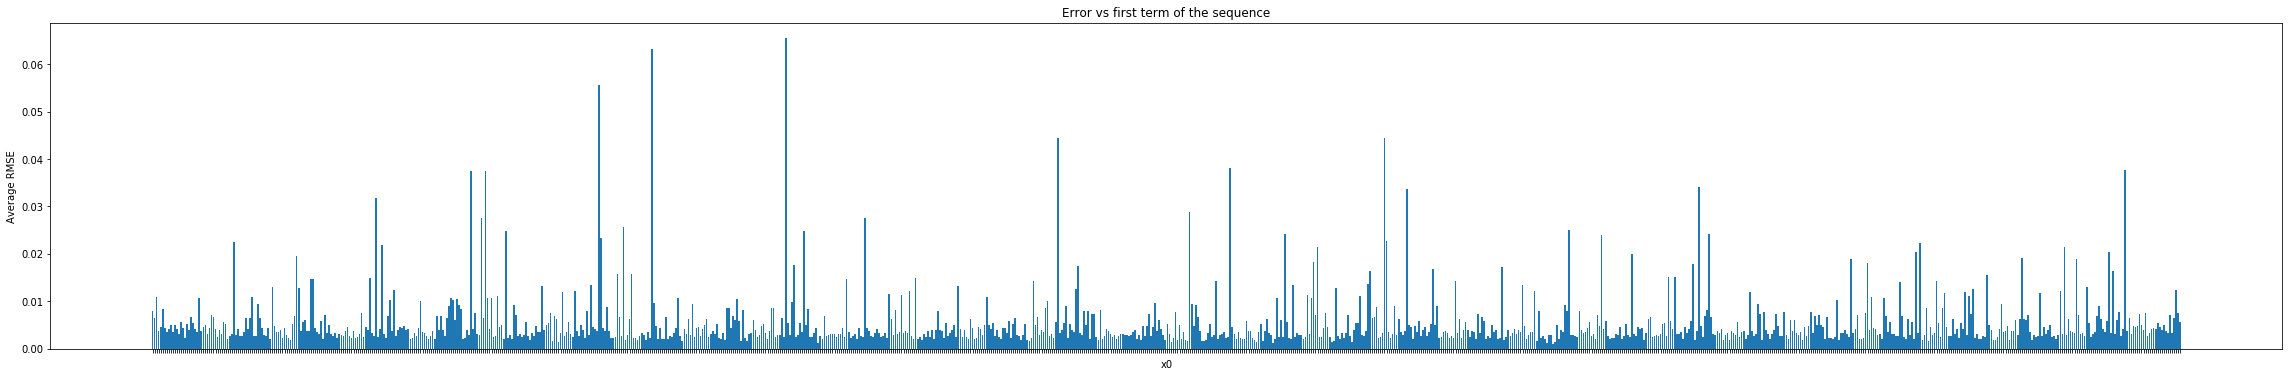

In [10]:
div = 1000

aver = np.zeros((div))
cont = np.zeros((div))
for i in range(menor.shape[0]):
    cla = int((list_of_x0[i]*div**2)/div)
    print(menor[i,3],list_of_x0[i],cla)
    aver[cla] = aver[cla] + menor[i,3]
    cont[cla] +=1
    
print(aver/cont)

ind = np.arange(div)

label = []

plt.figure(figsize=(40,6))
plt.bar(ind, aver/cont)
plt.xticks(ind, label, fontsize=4, rotation=90)
plt.title('Error vs first term of the sequence')
plt.ylabel('Average RMSE')
plt.xlabel('x0')
plt.show()

[176.  92.  59.  43.  60.  52.  53.  49.  82. 167.] [1917.  836.  675.  609.  607.  565.  627.  717.  834. 1868.] [171.  97.  73.  51.  59.  66.  48.  56.  80. 174.]
[0.20630892 0.09363669 0.07360406 0.063905   0.06598985 0.06236403
 0.06635243 0.07496374 0.09082669 0.20204859] [0.21128451 0.11044418 0.07082833 0.05162065 0.07202881 0.06242497
 0.06362545 0.05882353 0.09843938 0.20048019] [0.20713128 0.09032955 0.07293355 0.06580227 0.06558617 0.06104808
 0.06774716 0.07747164 0.09011345 0.20183684] [0.19542857 0.11085714 0.08342857 0.05828571 0.06742857 0.07542857
 0.05485714 0.064      0.09142857 0.19885714]
oi [1.0241172  1.17949677 0.96228836 0.80777162 1.09151353 1.00097714
 0.95890159 0.78469308 1.08381556 0.99223754] [1.00398607 0.96468114 0.99089029 1.02968884 0.99388272 0.9788989
 1.0210201  1.03345477 0.99214731 0.99895203] [0.94726186 1.18390707 1.13347783 0.91206809 1.0218022  1.20948837
 0.8267541  0.85374607 1.00662675 0.98420458]


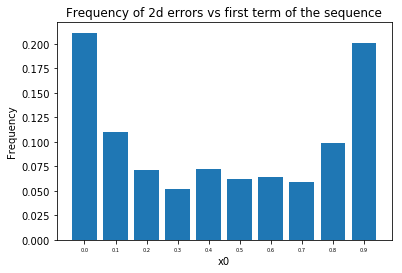

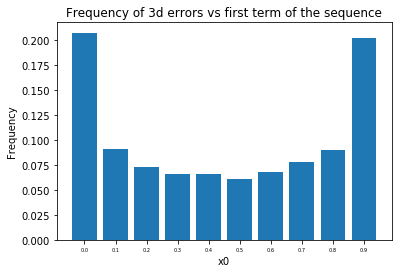

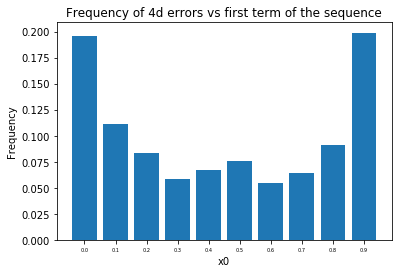

oi [1.0241172  1.17949677 0.96228836 0.80777162 1.09151353 1.00097714
 0.95890159 0.78469308 1.08381556 0.99223754] [1.00398607 0.96468114 0.99089029 1.02968884 0.99388272 0.9788989
 1.0210201  1.03345477 0.99214731 0.99895203] [0.94726186 1.18390707 1.13347783 0.91206809 1.0218022  1.20948837
 0.8267541  0.85374607 1.00662675 0.98420458]


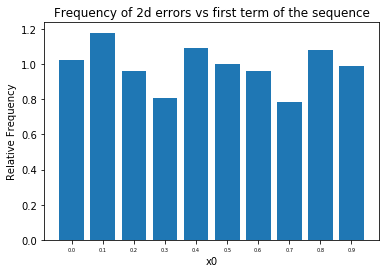

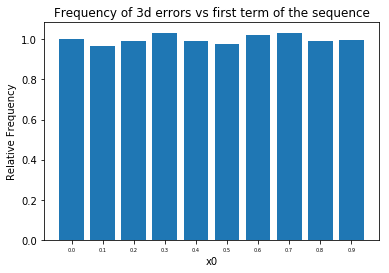

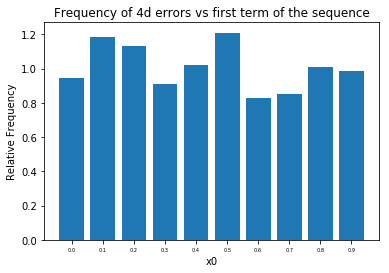

In [35]:
div = 10

cont = np.zeros((div))
cont2d = np.zeros((div))
cont3d = np.zeros((div))
cont4d = np.zeros((div))

for i in range(menor.shape[0]):
    cla = int((list_of_x0[i]*div**2)/div)
    cont[cla] +=1
    if menor[i,3]<0.1 and menor[i,3]>0.01:
        cont2d[cla] +=1
    elif menor[i,3]<0.01 and menor[i,3]>0.001:
        cont3d[cla] +=1
    elif menor[i,3]<0.001:
        cont4d[cla] +=1
        
print(cont2d,cont3d,cont4d)


freq_cont = np.zeros((div))
freq_cont2d = np.zeros((div))
freq_cont3d = np.zeros((div))
freq_cont4d = np.zeros((div))

freq_cont = cont/np.sum(cont)
freq_cont2d = cont2d/np.sum(cont2d)
freq_cont3d = cont3d/np.sum(cont3d)
freq_cont4d = cont4d/np.sum(cont4d)

print(freq_cont,freq_cont2d,freq_cont3d,freq_cont4d)

ind = np.arange(div)

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont2d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont3d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont4d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont2d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont3d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

#plt.figure(figsize=(10,3))
plt.bar(ind, freq_cont4d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

[61. 21. 26. 14. 13. 14.  7. 11.  6.  3.  9. 12. 11.  6. 14. 11.  7.  7.
  3. 12.  8.  7.  7.  5.  2.  6.  7.  5.  8.  4.  5.  9.  5.  1.  4.  2.
  6.  3.  3.  5.  8.  7.  5.  5.  8.  9.  8.  0.  2.  8.  7.  6.  4.  4.
  6.  4.  3.  7.  3.  8.  8.  6.  5.  8.  5.  5.  5.  3.  3.  5.  3.  6.
  2.  4.  6.  7.  8.  3.  4.  6.  7.  8.  7.  8.  8.  6. 10.  6. 10. 12.
  4.  9.  8.  4.  9. 11. 21. 16. 26. 59.] [567. 253. 187. 180. 157. 126. 130. 108.  93. 116.  95.  96.  92.  89.
  82.  73.  77.  78.  82.  72.  80.  71.  56.  67.  76.  86.  65.  68.
  51.  55.  64.  65.  53.  64.  55.  64.  70.  46.  59.  69.  57.  71.
  69.  72.  50.  56.  61.  66.  58.  47.  60.  51.  59.  51.  57.  48.
  56.  66.  60.  57.  44.  65.  88.  59.  55.  63.  61.  65.  67.  60.
  78.  71.  60.  75.  82.  76.  78.  69.  64.  64.  74.  77.  90.  98.
  65.  84.  80.  82.  93.  91.  99.  92. 120. 113. 128. 149. 161. 177.
 238. 591.] [49. 20. 26. 13. 17. 12. 12.  3. 10.  9. 11. 11.  9.  9. 14. 11.  7. 10.
  9.  6.  6

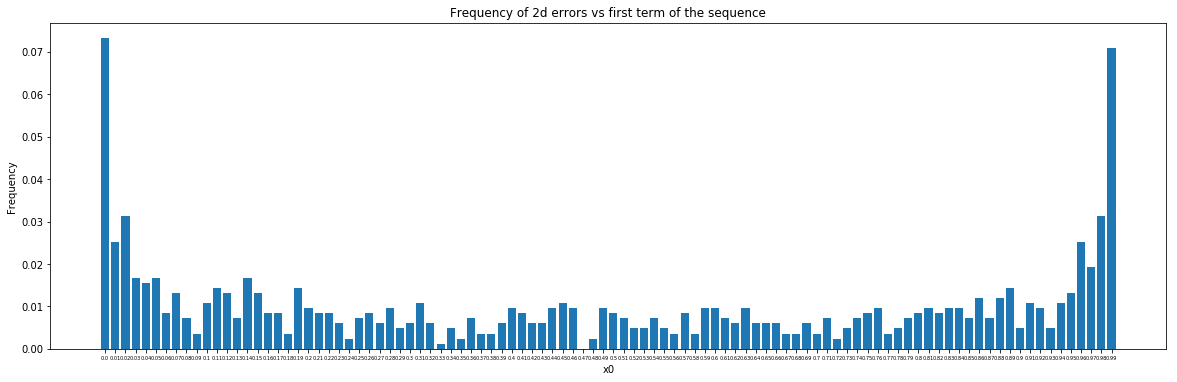

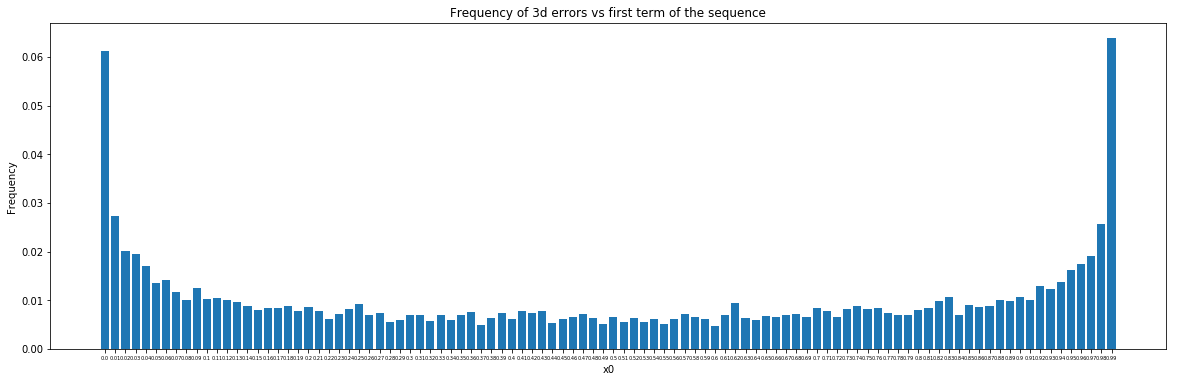

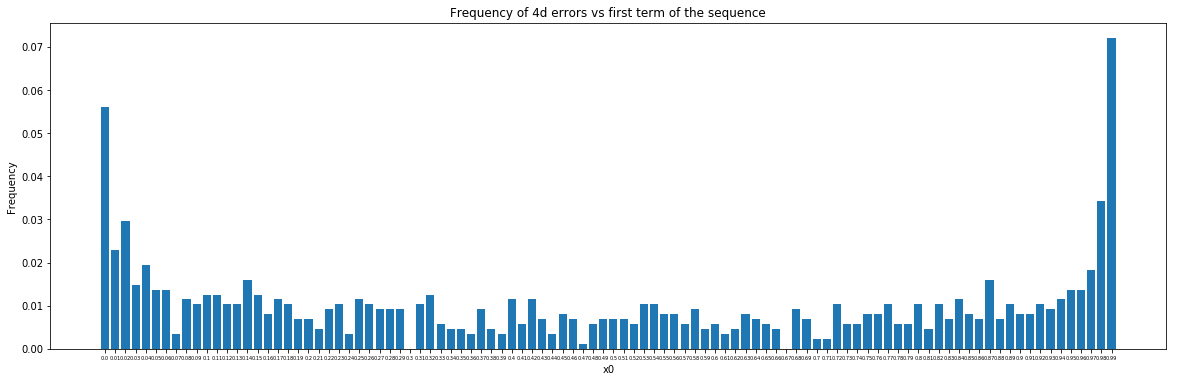

oi [1.18281925 0.94597839 1.43473389 0.89570901 0.91578759 1.21981424
 0.62218713 1.15619581 0.72901087 0.31039916 1.02752825 1.31342454
 1.30072029 0.76405947 1.6855615  1.517507   0.99683744 0.96568627
 0.4226712  1.74642165 1.12712319 1.13055954 1.26994359 0.7978131
 0.32301701 0.77904103 1.14451707 0.81751219 1.58133701 0.79066851
 0.95968822 1.41896759 0.95968822 0.18919568 0.84086968 0.3730619
 1.00585044 0.69703671 0.60198625 0.85998036 1.41266106 1.10364146
 0.78831533 0.7978131  1.70886419 1.65546218 1.41266106 0.
 0.40749838 1.73687836 1.26994359 1.24159664 0.77904103 0.81499677
 1.10364146 0.88291317 0.60198625 1.15882353 0.55959285 1.53550116
 1.82671689 1.0594958  0.68266482 1.43175108 0.98833563 0.90710257
 0.94597839 0.58428077 0.50937298 0.91970121 0.47868786 0.99327731
 0.36788049 0.63065226 0.8544321  1.01874596 1.11525874 0.49050731
 0.72568205 1.0594958  1.03006536 1.19044472 0.8745838  0.9376069
 1.26130452 0.81919778 1.3513977  0.76405947 1.21501812 1.41896759
 0.

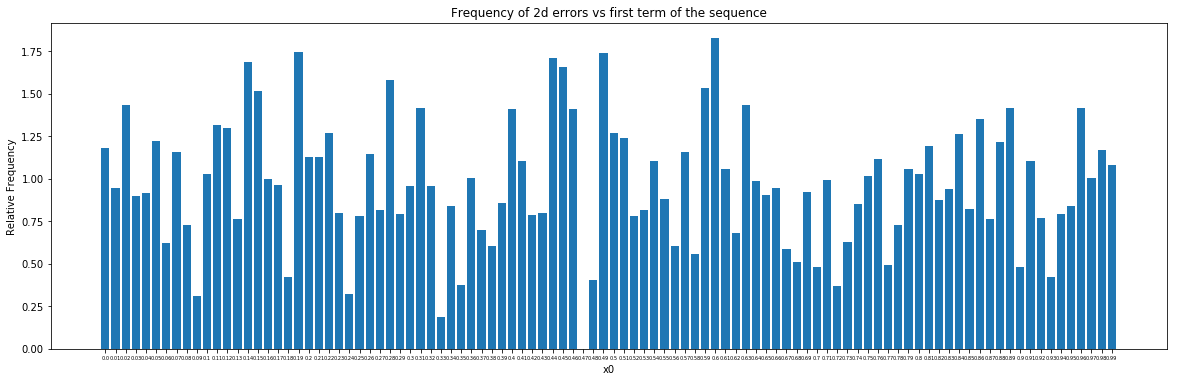

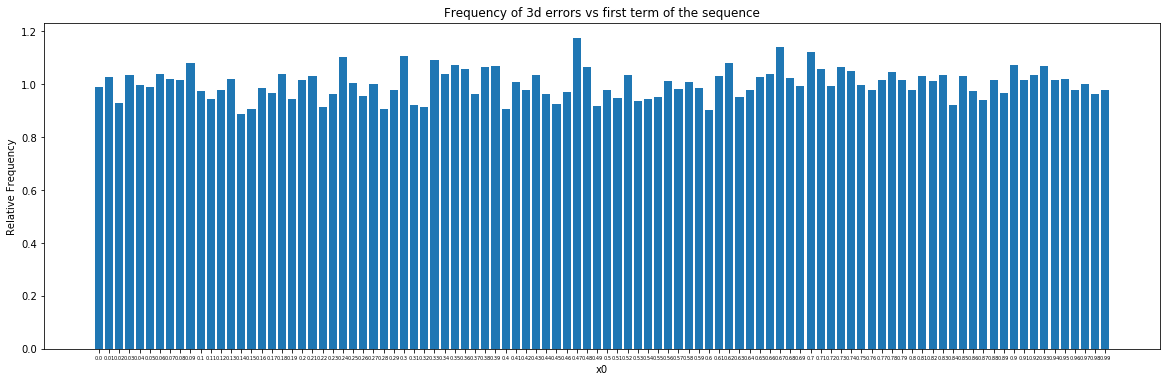

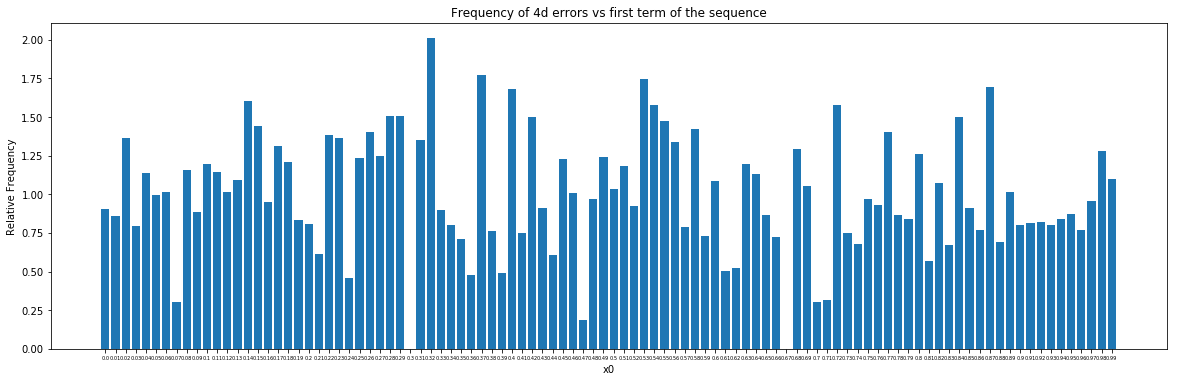

In [36]:
div = 100

cont = np.zeros((div))
cont2d = np.zeros((div))
cont3d = np.zeros((div))
cont4d = np.zeros((div))

for i in range(menor.shape[0]):
    cla = int((list_of_x0[i]*div**2)/div)
    cont[cla] +=1
    if menor[i,3]<0.1 and menor[i,3]>0.01:
        cont2d[cla] +=1
    elif menor[i,3]<0.01 and menor[i,3]>0.001:
        cont3d[cla] +=1
    elif menor[i,3]<0.001:
        cont4d[cla] +=1
        
print(cont2d,cont3d,cont4d)


freq_cont = np.zeros((div))
freq_cont2d = np.zeros((div))
freq_cont3d = np.zeros((div))
freq_cont4d = np.zeros((div))

freq_cont = cont/np.sum(cont)
freq_cont2d = cont2d/np.sum(cont2d)
freq_cont3d = cont3d/np.sum(cont3d)
freq_cont4d = cont4d/np.sum(cont4d)

print(freq_cont,freq_cont2d,freq_cont3d,freq_cont4d)

ind = np.arange(div)

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont2d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont3d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont4d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont2d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont3d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(20,6))
plt.bar(ind, freq_cont4d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

[21.  9. 10.  3.  2.  6.  2.  2.  2.  4.  3.  2.  3.  1.  3.  1.  0.  2.
  1.  5.  5.  2.  2.  3.  1.  3.  2.  1.  3.  4.  2.  3.  0.  1.  2.  3.
  1.  0.  1.  1.  0.  1.  1.  1.  0.  2.  3.  1.  2.  2.  0.  0.  3.  2.
  1.  1.  0.  2.  0.  5.  1.  2.  1.  1.  0.  1.  0.  0.  0.  1.  2.  2.
  1.  0.  1.  1.  0.  0.  1.  3.  1.  0.  0.  2.  0.  2.  1.  0.  0.  0.
  0.  0.  1.  0.  0.  0.  1.  0.  0.  1.  0.  0.  1.  2.  1.  1.  1.  2.
  1.  0.  0.  0.  2.  1.  1.  0.  1.  4.  0.  3.  1.  1.  3.  1.  2.  1.
  1.  0.  0.  1.  0.  2.  2.  0.  1.  0.  0.  0.  1.  0.  2.  1.  1.  0.
  0.  1.  2.  3.  3.  1.  3.  1.  2.  0.  0.  1.  0.  1.  1.  2.  0.  0.
  1.  1.  2.  1.  0.  2.  0.  0.  1.  1.  1.  0.  0.  0.  0.  0.  2.  2.
  0.  0.  0.  0.  1.  0.  0.  1.  0.  1.  0.  1.  3.  1.  1.  2.  2.  0.
  1.  1.  0.  1.  3.  0.  0.  2.  1.  0.  1.  0.  0.  2.  0.  0.  2.  0.
  1.  1.  1.  0.  0.  2.  1.  1.  1.  1.  0.  0.  0.  1.  3.  0.  0.  0.
  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0

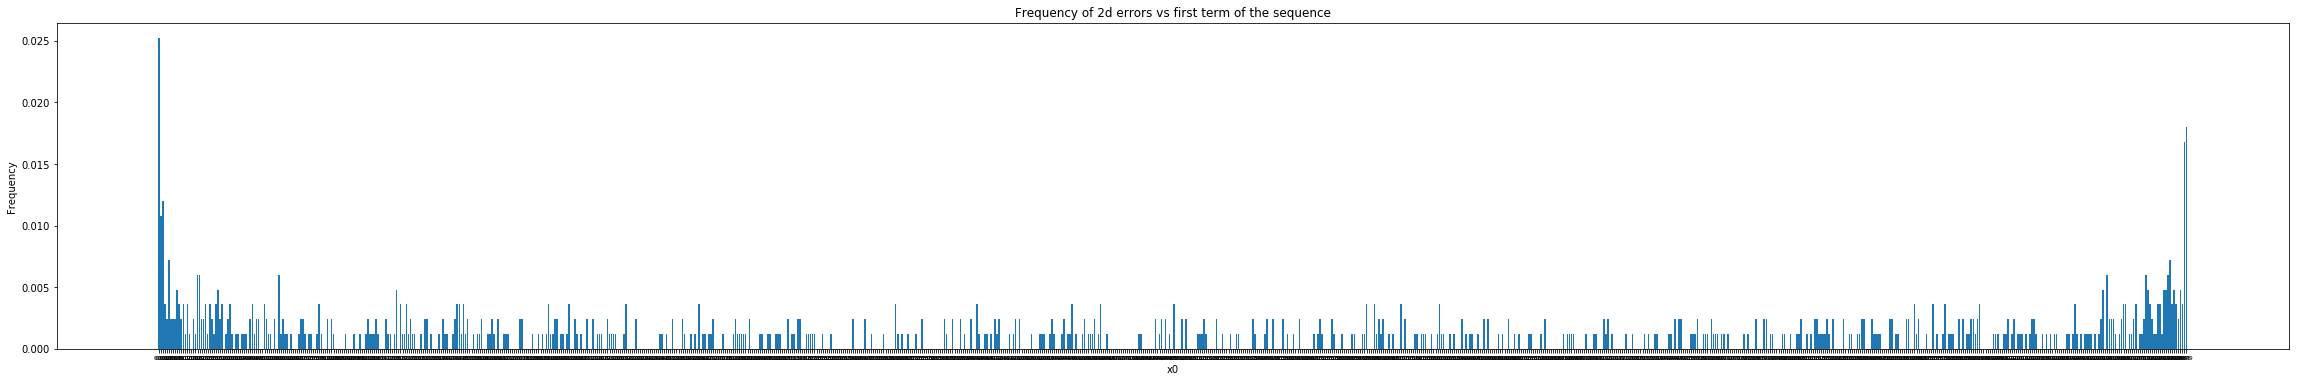

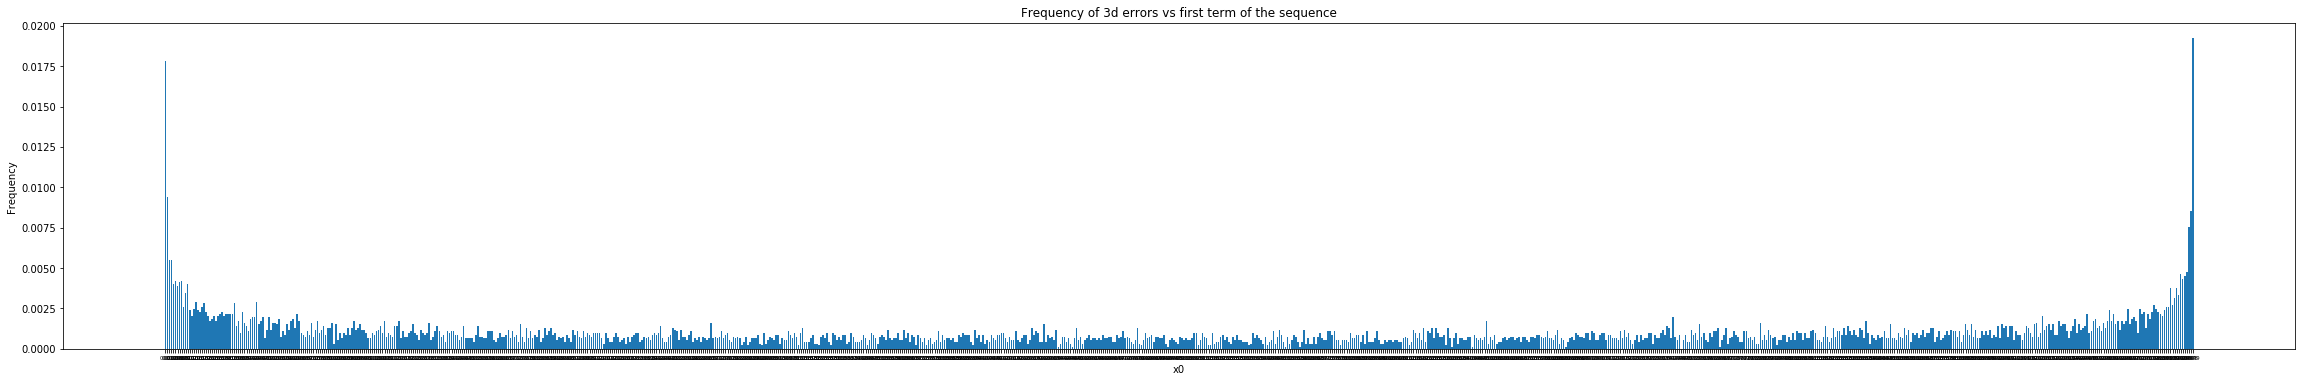

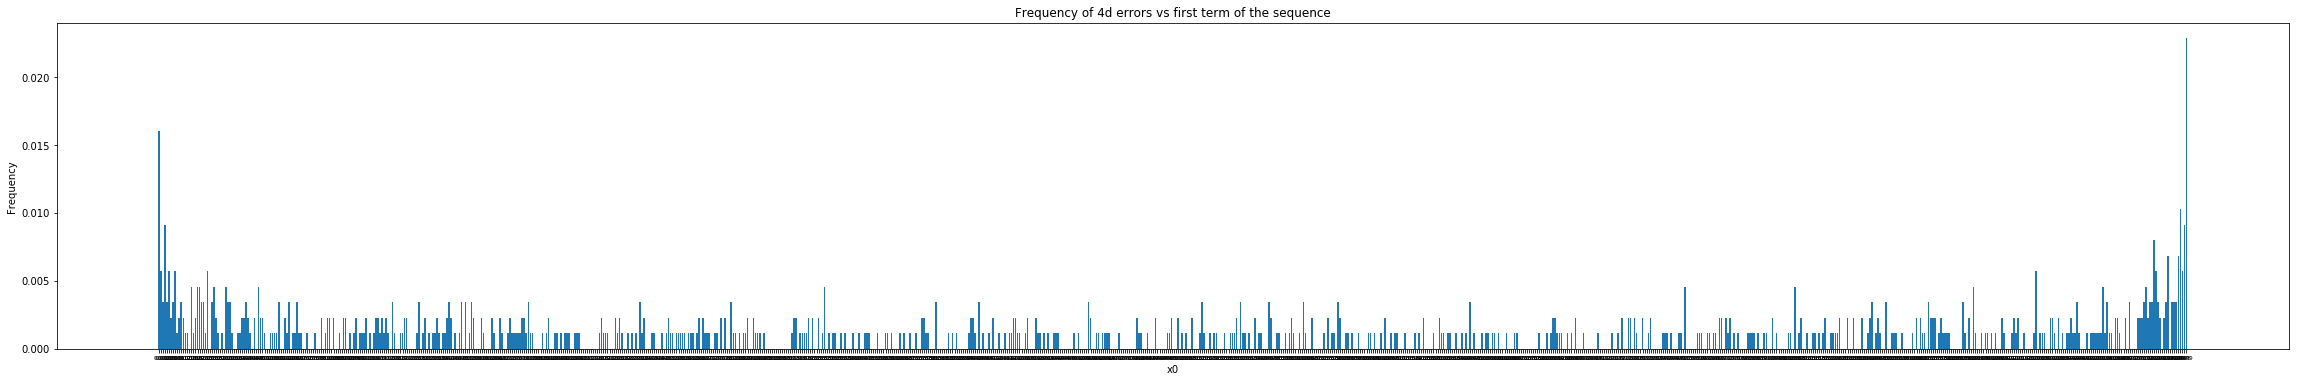

oi [ 1.37003767  1.16856154  2.03749192  0.64082407  0.63065226  1.55808206
  0.66218487  0.61598593  0.57581293  1.82671689  1.07381331  0.63065226
  1.47152194  0.63065226  1.47152194  0.4729892   0.          1.10364146
  0.49050731  1.89195678  2.20728291  1.10364146  1.26130452  1.80595875
  0.5297479   2.09111013  1.10364146  0.5297479   1.52811894  2.20728291
  1.2039725   1.65546218  0.          0.5297479   0.8544321   2.09111013
  0.73576097  0.          0.60198625  0.77904103  0.          1.01874596
  0.66218487  0.60198625  0.          0.88291317  2.33712308  0.69703671
  1.32436975  2.20728291  0.          0.          2.6487395   1.55808206
  0.82773109  0.82773109  0.          2.6487395   0.          4.13865546
  0.88291317  2.03749192  0.69703671  0.69703671  0.          0.63065226
  0.          0.          0.          1.47152194  2.03749192  2.407945
  0.77904103  0.          1.10364146  0.77904103  0.          0.
  0.88291317  3.31092437  0.88291317  0.          0.      

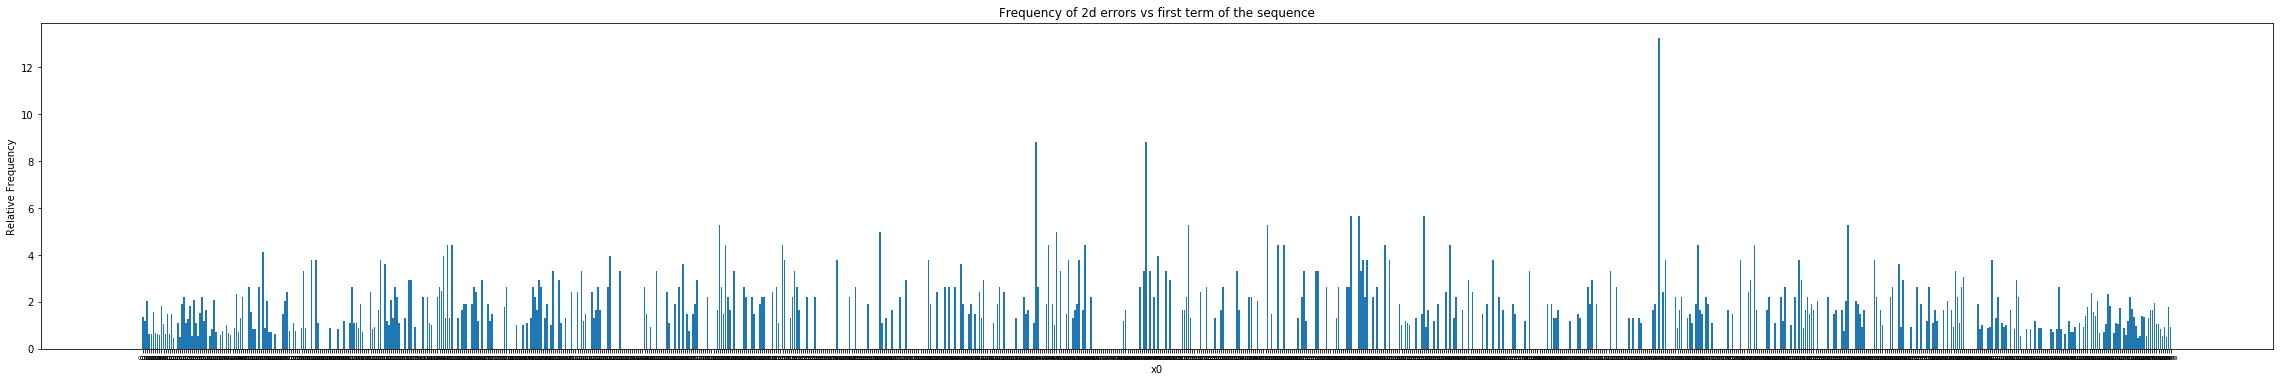

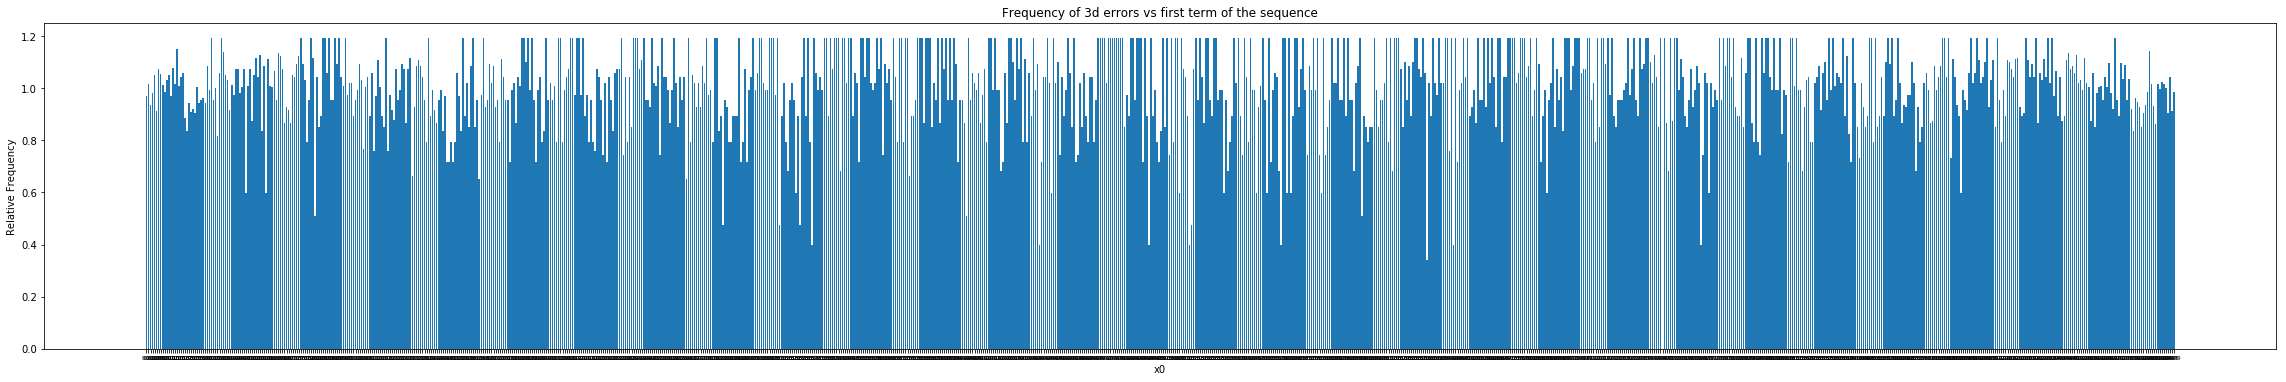

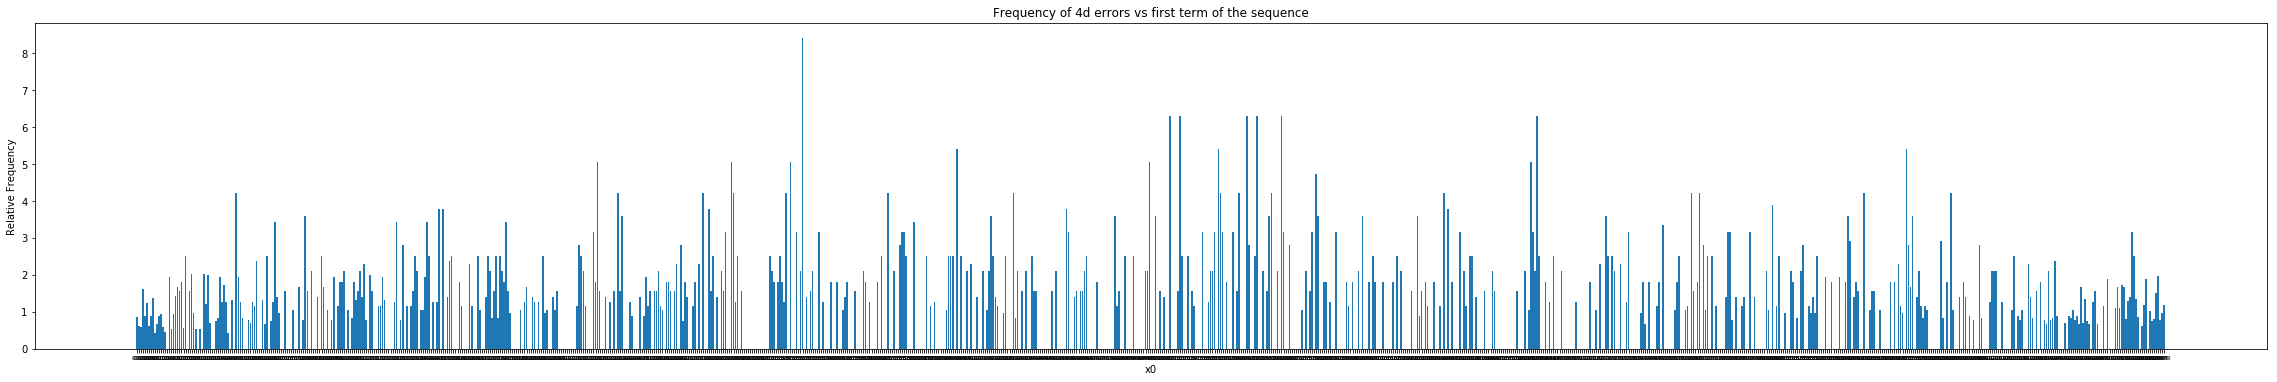

In [37]:
div = 1000

cont = np.zeros((div))
cont2d = np.zeros((div))
cont3d = np.zeros((div))
cont4d = np.zeros((div))

for i in range(menor.shape[0]):
    cla = int((list_of_x0[i]*div**2)/div)
    cont[cla] +=1
    if menor[i,3]<0.1 and menor[i,3]>0.01:
        cont2d[cla] +=1
    elif menor[i,3]<0.01 and menor[i,3]>0.001:
        cont3d[cla] +=1
    elif menor[i,3]<0.001:
        cont4d[cla] +=1
        
print(cont2d,cont3d,cont4d)


freq_cont = np.zeros((div))
freq_cont2d = np.zeros((div))
freq_cont3d = np.zeros((div))
freq_cont4d = np.zeros((div))

freq_cont = cont/np.sum(cont)
freq_cont2d = cont2d/np.sum(cont2d)
freq_cont3d = cont3d/np.sum(cont3d)
freq_cont4d = cont4d/np.sum(cont4d)

print(freq_cont,freq_cont2d,freq_cont3d,freq_cont4d)

ind = np.arange(div)

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont2d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont3d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont4d)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Frequency')
plt.xlabel('x0')
plt.show()

label = []

print('oi',freq_cont2d/freq_cont,freq_cont3d/freq_cont,freq_cont4d/freq_cont)
plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont2d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 2d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont3d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 3d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()

plt.figure(figsize=(40,6))
plt.bar(ind, freq_cont4d/freq_cont)
plt.xticks(ind,ind/div, fontsize=5)
plt.title('Frequency of 4d errors vs first term of the sequence')
plt.ylabel('Relative Frequency')
plt.xlabel('x0')
plt.show()